# Importing Libraries

In [90]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [91]:
cancer_data = pd.read_csv('C:/Users/PUSPAK/OneDrive/Desktop/Codes by me/Breast cancer/data.csv')

In [92]:
cancer_data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [93]:
cancer_data.shape 

(569, 33)

This dataset has 33 features and 569 entries

In [94]:
cancer_data.columns 

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [95]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

As it is clear from the data that the first column consists only Patients I.D. numbers which doesn't hold any significance in analysis, as well as model training.

Again the last column doesn't hold any value.

So, the first and the last columns can be dropped from the data before go any further.

In [96]:
# Dropping the first column:
cancer_data = cancer_data.drop('id', axis = 1)

In [97]:
# Dropping the last column:
cancer_data = cancer_data.drop('Unnamed: 32', axis = 1)

In [98]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [99]:
cancer_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Checking for Null Values

In [100]:
cancer_data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Luckily none of the columns of this dataset has any null values present.

# In this dataset the target variable be 'diagnosis', which have only two categories 'M' & 'B', let's count them:


In [101]:
pd.value_counts(cancer_data['diagnosis'])

B    357
M    212
Name: diagnosis, dtype: int64

Showing the count on a Count plot:

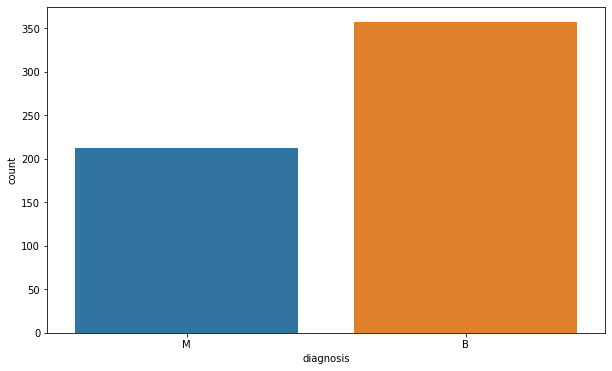

In [102]:
plt.figure(figsize = (10,6))
sns.countplot(x = cancer_data['diagnosis'])
plt.show()

Now let's create a Heatmap to show the correlations between the columns

# Correlation Heatmap

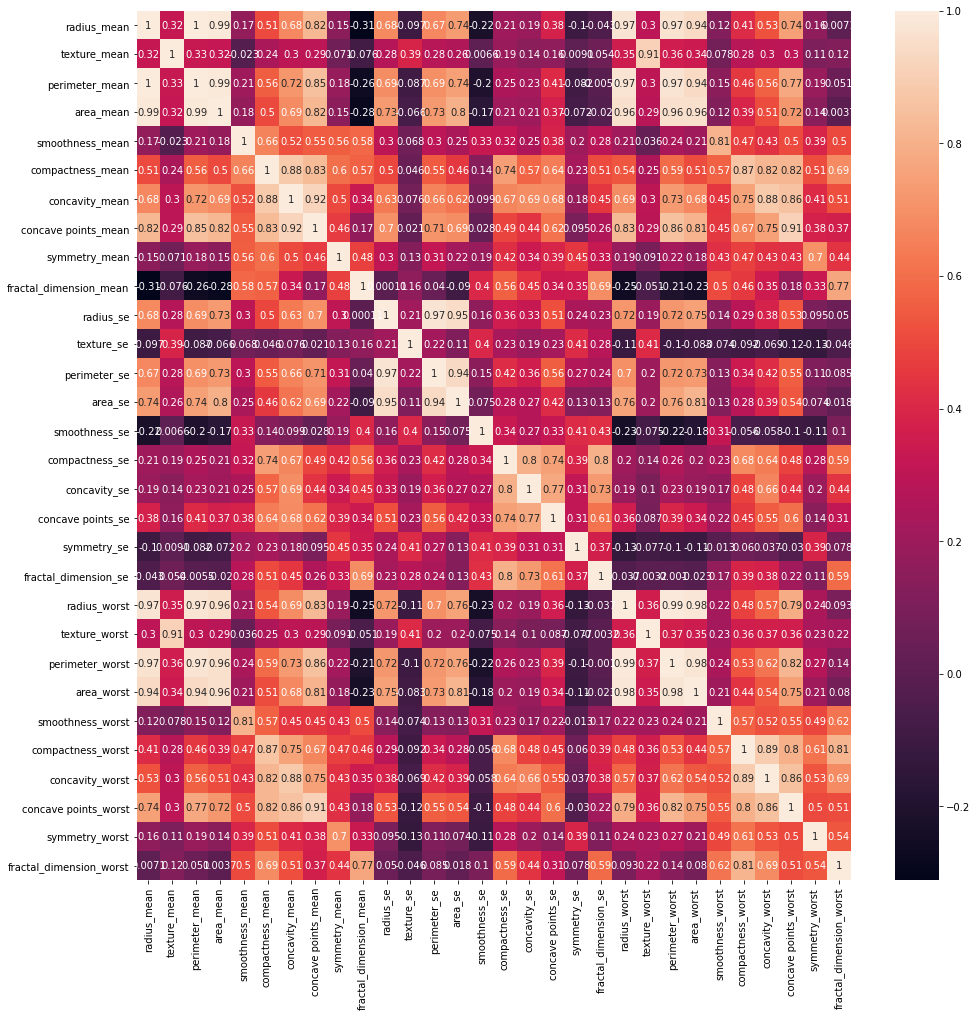

In [103]:
plt.figure(figsize = (16,16))
sns.heatmap(cancer_data.corr(), annot=True)
plt.show()

By the Heatmap it can be observed than some of the pair has highly negative correlations. Let's plot them in scatterplots:

# Scatter Plots

**fractal_dimension_mean** *vs* **area_mean**

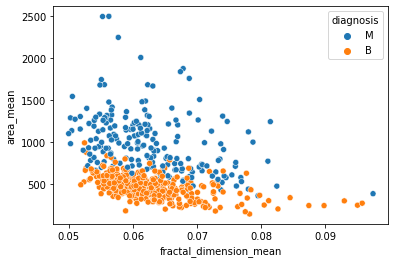

In [104]:
sns.scatterplot(x = cancer_data['fractal_dimension_mean'], y = cancer_data['area_mean'], hue = cancer_data['diagnosis'])
plt.show()

**fractal_dimension_mean** *vs* **perimeter_mean**

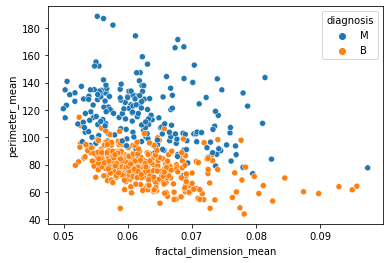

In [105]:
sns.scatterplot(x = cancer_data['fractal_dimension_mean'], y = cancer_data['perimeter_mean'], hue = cancer_data['diagnosis'])
plt.show()

**fractal_dimension_mean** *vs* **radius_mean**

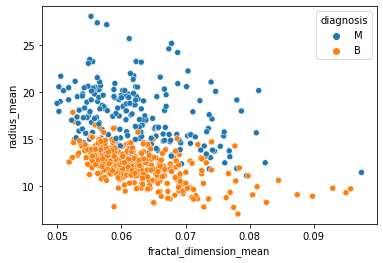

In [106]:
sns.scatterplot(x = cancer_data['fractal_dimension_mean'], y = cancer_data['radius_mean'], hue = cancer_data['diagnosis'])
plt.show()

**fractal_dimension_mean** *vs* **radius_worst**

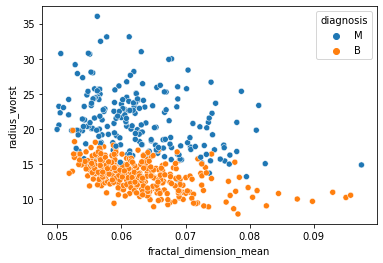

In [107]:
sns.scatterplot(x = cancer_data['fractal_dimension_mean'], y = cancer_data['radius_worst'], hue = cancer_data['diagnosis'])
plt.show()

**smoothness_se** *vs* **radius_worst**

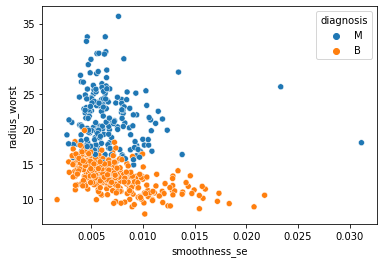

In [108]:
sns.scatterplot(x = cancer_data['smoothness_se'], y = cancer_data['radius_worst'], hue = cancer_data['diagnosis'])
plt.show()

**perimeter_worst** *vs* **fractal_dimension_mean**

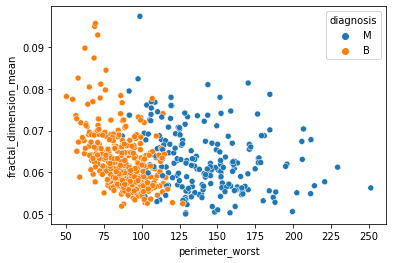

In [109]:
sns.scatterplot(x = cancer_data['perimeter_worst'], y = cancer_data['fractal_dimension_mean'], hue = cancer_data['diagnosis'])
plt.show()

**area_worst** *vs* **fractal_dimension_mean**

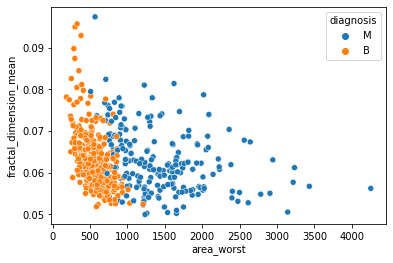

In [110]:
sns.scatterplot(x = cancer_data['area_worst'], y = cancer_data['fractal_dimension_mean'], hue = cancer_data['diagnosis'])
plt.show()

**perimeter_worst** *vs* **smoothness_se**

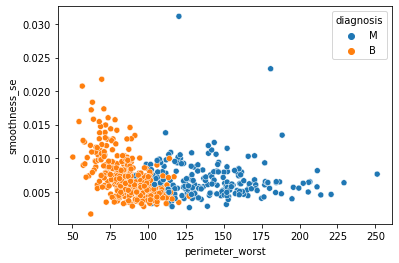

In [111]:
sns.scatterplot(x = cancer_data['perimeter_worst'], y = cancer_data['smoothness_se'], hue = cancer_data['diagnosis'])
plt.show()

**radius_worst** *vs* **smoothness_se**

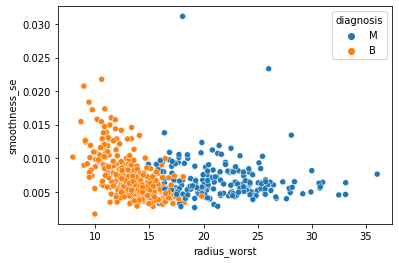

In [112]:
sns.scatterplot(x = cancer_data['radius_worst'], y = cancer_data['smoothness_se'], hue = cancer_data['diagnosis'])
plt.show()

# Data Preprocessing

In [113]:
X = cancer_data.iloc[:,1:]
y = cancer_data.iloc[:,0]

In [114]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [115]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

As the target varible "y" is of data type "Object", it needs to be encoded with 0s and 1s.
For this purpose sklearn's LabelEncoder() is used as it is a bi-classification problem.

In [116]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y) 

In [117]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

Here each of the M is represented as 1 and B is represented as 0.

# Splitting the dataset into Training and Test sets

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)

In [119]:
X_train , y_train

(     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
 436       12.870         19.54           82.67      509.2          0.09136   
 390       10.260         12.22           65.75      321.6          0.09996   
 261       17.350         23.06          111.00      933.1          0.08662   
 339       23.510         24.27          155.10     1747.0          0.10690   
 282       19.400         18.18          127.20     1145.0          0.10370   
 ..           ...           ...             ...        ...              ...   
 277       18.810         19.98          120.90     1102.0          0.08923   
 9         12.460         24.04           83.97      475.9          0.11860   
 359        9.436         18.32           59.82      278.6          0.10090   
 192        9.720         18.22           60.73      288.1          0.06950   
 559       11.510         23.93           74.52      403.5          0.09261   
 
      compactness_mean  concavity_mean  concave po

In [120]:
X_test , y_test

(     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
 512        13.40         20.52           88.64      556.7          0.11060   
 457        13.21         25.25           84.10      537.9          0.08791   
 439        14.02         15.66           89.59      606.5          0.07966   
 298        14.26         18.17           91.22      633.1          0.06576   
 37         13.03         18.42           82.61      523.8          0.08983   
 ..           ...           ...             ...        ...              ...   
 252        19.73         19.82          130.70     1206.0          0.10620   
 202        23.29         26.67          158.90     1685.0          0.11410   
 246        13.20         17.43           84.13      541.6          0.07215   
 240        13.64         15.60           87.38      575.3          0.09423   
 38         14.99         25.20           95.54      698.8          0.09387   
 
      compactness_mean  concavity_mean  concave po

# Feature Scaling

In [121]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [122]:
X_train , X_test

(array([[-0.37930393,  0.07273152, -0.40430194, ..., -0.80174318,
          0.65409857, -0.35187496],
        [-1.10613062, -1.66672007, -1.08913989, ..., -0.75383303,
          0.06677378, -0.35905093],
        [ 0.86827598,  0.90918912,  0.74235641, ..., -0.51750697,
         -0.69081272, -1.02531143],
        ...,
        [-1.33559621, -0.21717708, -1.32915697, ..., -1.0062827 ,
         -0.68768865, -0.13052413],
        [-1.25650855, -0.24094008, -1.29232467, ..., -1.78205869,
         -1.53899718, -1.00102355],
        [-0.75803355,  1.11592722, -0.73417365, ..., -0.29976145,
         -1.22190428,  0.19846614]]),
 array([[-0.23171077,  0.30560892, -0.16266585, ...,  1.36741986,
          1.07897182,  1.50007531],
        [-0.28462153,  1.42959882, -0.34642261, ..., -0.85994174,
         -0.70330899, -0.87461622],
        [-0.05905462, -0.84927287, -0.12421455, ..., -0.52042457,
         -1.18441546, -0.91767199],
        ...,
        [-0.2874063 , -0.42866777, -0.34520835, ..., -

# Applying Different Machine Learning Algorithms:

## *Logistic Regression*

In [123]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state = 0)
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predicting the test result

In [124]:
y_pred_logit = logit.predict(X_test)

### Confusion Matrix

In [125]:
from sklearn.metrics import confusion_matrix
cm_logit = confusion_matrix(y_test, y_pred_logit)
print(cm_logit)

[[125   2]
 [  3  70]]


### Accuracy Score

In [126]:
from sklearn.metrics import accuracy_score
accuracy_logit = accuracy_score(y_test, y_pred_logit)

In [127]:
print(accuracy_logit*100, "%")

97.5 %


### Classification Report

In [128]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_logit))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       127
           1       0.97      0.96      0.97        73

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



### Applying K-fold Cross Validation where K=10; to see the mean accuracy of the model:

In [129]:
from sklearn.model_selection import cross_val_score
accuracies_logit = cross_val_score(estimator = logit, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_logit.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_logit.std()*100)) 

Accuracy: 98.11 %
Standard Deviation: 2.72 %


## *Decision Tree Classifier*

In [130]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Predicting the test result

In [131]:
y_pred_dt = dt.predict(X_test)

### Confusion Matrix

In [132]:
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

[[119   8]
 [  4  69]]


### Accuracy Score

In [133]:
from sklearn.metrics import accuracy_score
accuracy_dt = accuracy_score(y_test, y_pred_dt)

In [134]:
print(accuracy_dt*100, "%")

94.0 %


### Classification Report

In [135]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       127
           1       0.90      0.95      0.92        73

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



### Applying K-fold Cross Validation where K=10; to see the mean accuracy of the model:

In [136]:
from sklearn.model_selection import cross_val_score
accuracies_dt = cross_val_score(estimator = dt, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_dt.mean()*100)) 
print("Standard Deviation: {:.2f} %".format(accuracies_dt.std()*100)) 

Accuracy: 92.39 %
Standard Deviation: 5.14 %


## *Random Forest Classifier*

In [137]:
from sklearn.ensemble import RandomForestClassifier
rt = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rt.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Predicting the test results

In [138]:
y_pred_rt = rt.predict(X_test)

### Confusion Matrix

In [139]:
from sklearn.metrics import confusion_matrix
cm_rt = confusion_matrix(y_test, y_pred_rt)
print(cm_rt)

[[125   2]
 [  6  67]]


### Accuracy Score

In [140]:
from sklearn.metrics import accuracy_score
accuracy_rt = accuracy_score(y_test, y_pred_rt)

In [141]:
print(accuracy_rt*100, "%")

96.0 %


### Classification Report

In [142]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rt))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       127
           1       0.97      0.92      0.94        73

    accuracy                           0.96       200
   macro avg       0.96      0.95      0.96       200
weighted avg       0.96      0.96      0.96       200



### Applying K-fold Cross Validation where K=10; to see the mean accuracy of the model:

In [143]:
from sklearn.model_selection import cross_val_score
accuracies_rt = cross_val_score(estimator = rt, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_rt.mean()*100)) 
print("Standard Deviation: {:.2f} %".format(accuracies_rt.std()*100)) 

Accuracy: 94.86 %
Standard Deviation: 3.72 %


## *Naive-Bayes Classifier*

In [144]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Predicting the test results

In [145]:
y_pred_nb = nb.predict(X_test)

### Confusion Matrix

In [146]:
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(cm_nb)

[[118   9]
 [ 10  63]]


### Accuracy Score

In [147]:
from sklearn.metrics import accuracy_score
accuracy_nb = accuracy_score(y_test, y_pred_nb)

In [148]:
print(accuracy_nb*100, "%")

90.5 %


### Classification Report

In [149]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       127
           1       0.88      0.86      0.87        73

    accuracy                           0.91       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.91      0.90       200



### Applying K-fold Cross Validation where K=10; to see the mean accuracy of the model:

In [150]:
from sklearn.model_selection import cross_val_score
accuracies_nb = cross_val_score(estimator = nb, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_nb.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_nb.std()*100)) 

Accuracy: 93.75 %
Standard Deviation: 4.56 %


## *K-Nearest Neighbour Classifier*

**First of all the number of neighbours to be selected should be determined, for this using AUC scores for different number of 
neighbours. Finally showing the top 10 numbers of neighbours in terms of AUC score**

In [151]:
roc_auc = {}
il = []
accuracy_knn=[]
for  i in range(1,100):
  from sklearn.neighbors import KNeighborsClassifier

  knn = KNeighborsClassifier(n_neighbors=i)

  knn.fit(X_train,y_train)

  y_pred = knn.predict(X_test)

  from sklearn.metrics import accuracy_score
  il.append(i)
  accuracy_knn.append( sklearn.metrics.roc_auc_score(y_test,y_pred) )

  roc_auc.update({'K':il})
  roc_auc.update({'ROC_AUC':accuracy_knn})

cas = pd.DataFrame(roc_auc)
cas.sort_values('ROC_AUC', ascending = False, inplace = True, ignore_index = True)
cas.head(10)

,K,ROC_AUC
0,5,0.944181
1,8,0.941268
2,9,0.941268
3,10,0.941268
4,11,0.937331
5,7,0.937331
6,15,0.934419
7,6,0.934419
8,13,0.934419
9,3,0.933394


**By the above output it is the K=5 which poses the highest AUC score**

In [152]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Predicting the test results

In [153]:
y_pred_knn = knn.predict(X_test)

### Confusion Matrix

In [154]:
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[125   2]
 [  7  66]]


### Accuracy Score

In [155]:
from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(y_test, y_pred_knn)

In [156]:
print(accuracy_knn*100, "%")

95.5 %


### Classification Report

In [157]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       127
           1       0.97      0.90      0.94        73

    accuracy                           0.95       200
   macro avg       0.96      0.94      0.95       200
weighted avg       0.96      0.95      0.95       200



### Applying K-fold Cross Validation where K=10; to see the mean accuracy of the model:

In [158]:
from sklearn.model_selection import cross_val_score
accuracies_knn = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_knn.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_knn.std()*100))

Accuracy: 95.38 %
Standard Deviation: 3.27 %


## *XGBoost Classifier*

In [159]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

[14:02:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

Predicting the test results

In [160]:
y_pred_xg = xgb.predict(X_test)

### Confusion Matrix

In [161]:
from sklearn.metrics import confusion_matrix
cm_xg = confusion_matrix(y_test, y_pred_xg)
print(cm_xg)

[[125   2]
 [  2  71]]


### Accuracy Score

In [162]:
from sklearn.metrics import accuracy_score
accuracy_xg = accuracy_score(y_test, y_pred_xg)

In [163]:
print(accuracy_xg*100, "%")

98.0 %


### Classification Report

In [167]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       127
           1       0.97      0.90      0.94        73

    accuracy                           0.95       200
   macro avg       0.96      0.94      0.95       200
weighted avg       0.96      0.95      0.95       200



### Applying K-fold Cross Validation where K=10; to see the mean accuracy of the model:

In [168]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
accuracies_xg = cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_xg.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_xg.std()*100))

[14:05:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:05:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:05:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:05:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

As all the accuracy scores for all the machinee learning algorithms are in hand; now it should be decided which of the model is the best at predicting the future data (if any).

For this, ***AUC (Area Under the ROC Curve)*** scores must be determined for each of the model.
**AUC** ranges in value from *0* to *1*. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

# AUC Scores

## *KNN Model*

In [169]:
sklearn.metrics.roc_auc_score(y_test,y_pred_knn)

0.9441807787725165

## *Decision Tree Model*

In [170]:
sklearn.metrics.roc_auc_score(y_test,y_pred_dt)

0.9411066767339015

## *Logistic Regression Model*

In [171]:
sklearn.metrics.roc_auc_score(y_test,y_pred_logit)

0.971578039046489

## *Naive-Bayes Model*

In [172]:
sklearn.metrics.roc_auc_score(y_test,y_pred_nb) 

0.8960737784489268

## *Random Forest Model*

In [173]:
sklearn.metrics.roc_auc_score(y_test,y_pred_rt) 

0.9510300938410097

## *XGBoost Model*

In [174]:
sklearn.metrics.roc_auc_score(y_test,y_pred_xg)

0.9784273541149822

The AUC scores for **Logistic Regression** and **XGBoost Classifier** are very much similar.

To determine the best model ***AIC (Akaike Information Criterion)*** for each of them should be checked. 

Lower the ***AIC Score*** better the model

# Calculating AIC Score

In [175]:
from math import log

### *for* ***Logistic Regression Model***

In [176]:
resid_logit = y_test - y_pred_logit
sse_logit = sum(resid_logit ** 2)
var_logit = 9
AIC_logit = 2 * var_logit - 2 * log(sse_logit)

In [177]:
print(AIC_logit)

14.781124175131799


### *for* ***XGBoost Classifier Model***

In [178]:
resid_xg = y_test - y_pred_xg
sse_xg = sum(resid_xg ** 2)
var_xg = 9
AIC_xg = 2 * var_xg - 2 * log(sse_xg) 

In [179]:
print(AIC_xg)

15.227411277760218


As the AIC scores for both of the models are very close, it is quite tough to choose any one of them as the best model.

So, the actual test set and the predictions done by both of the models are combined to create a Data frame:

In [180]:
results = pd.DataFrame()
results['Actual'] = y_test
results['Logit_predictions'] = y_pred_logit
results['XGBoost_Predictions'] = y_pred_xg

In [189]:
print(results.head(60))

    Actual  Logit_predictions  XGBoost_Predictions
0        1                  1                    1
1        0                  0                    0
2        0                  0                    0
3        0                  0                    0
4        0                  0                    0
5        0                  0                    0
6        0                  0                    0
7        0                  0                    0
8        0                  0                    0
9        0                  0                    0
10       0                  0                    0
11       0                  0                    0
12       0                  0                    0
13       0                  0                    0
14       0                  0                    1
15       1                  1                    1
16       0                  0                    0
17       1                  1                    1
18       1                  1  